# Data Analytics for House Pricing 
# House Sales in King County, USA

# Table of Contents
Instructions
About the Dataset
- Task 1: Importing Data
- Task 2: Data Wrangling
- Task 3: Exploratory Data Analysis
- Task 4: Model Development
- Task 5: Model Evaluation and Refinement

# Instructions
In this project, we are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. we are tasked with determining the market price of a house given a set of features. we will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. 

# About the Dataset
- This dataset contains house sale prices for King County, which includes Seattle.
-  It includes homes sold between May 2014 and May 2015.
- It was taken from kaggle.
-- (https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)
- It was also slightly modified for the purposes of those tasks. 

# Import the required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Task 1: Importing \ Loading Data Sets

Load the csv:

In [3]:
df = pd.read_csv('housing.csv')

We use the method head to display the first 5 columns of the dataframe.

In [4]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Display the data types of each column using the function dtypes.

In [5]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.

In [6]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Task 2: Data Wrangling

Remove unwanted coloumns and Check for a null values 

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df.drop(['Unnamed: 0','id'],axis=1,inplace=True)

In [10]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

We can see we have missing values for the columns  bedrooms and  bathrooms 

In [13]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace(). 

In [14]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column 'bathrooms' with the mean of the column 'bathrooms'  using the method replace().

In [15]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

We can see we have not any missing values for the columns bedrooms and bathrooms

In [16]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Task 3: Exploratory Data Analysis

We Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a data frame. 

In [17]:
floors_count  = df['floors'].value_counts().to_frame()

In [18]:
floors_count

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


We use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.

In [19]:
df['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

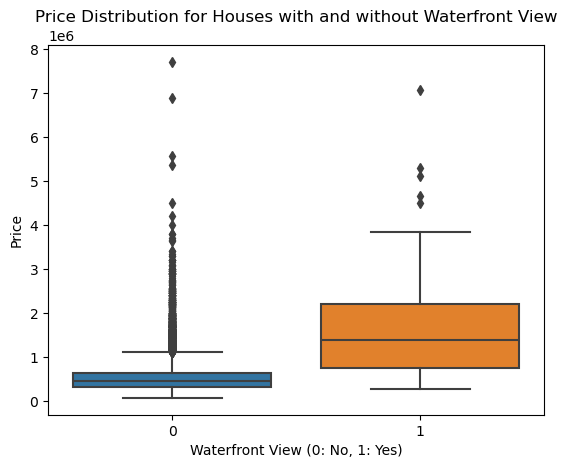

In [20]:
sns.boxplot(x= df['waterfront'],y=df['price'],data=df)
plt.title('Price Distribution for Houses with and without Waterfront View')
plt.xlabel('Waterfront View (0: No, 1: Yes)')
plt.ylabel('Price')
plt.show()

We use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

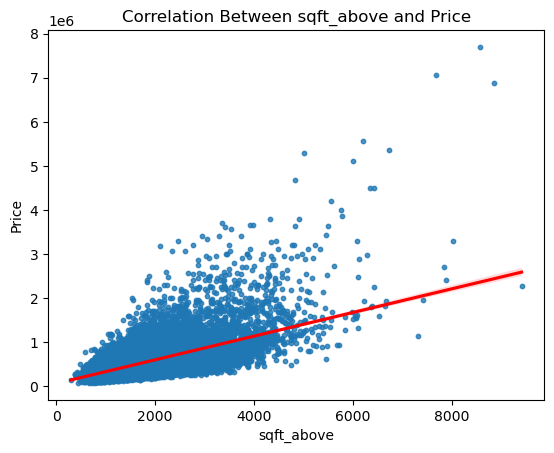

In [21]:
sns.regplot(x=df['sqft_above'],y=df['price'],data=df,scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Correlation Between sqft_above and Price')
plt.xlabel('sqft_above')
plt.ylabel('Price')
plt.show()

We can use the Pandas method corr() to find the feature other than price that is most correlated with price.

In [23]:
df['date'] = pd.to_datetime(df['date']) # we forgot to change datatype object to date
df.corr()['price'].sort_values()

zipcode         -0.053203
date            -0.004357
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Task 4: Model Development
We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.

In [25]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
print("R^2 = ",lm.score(X, Y))

R^2 =  0.00046769430149007363


Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. 

In [26]:
x=df[['sqft_living']]
y=df['price']
lm=LinearRegression()

In [29]:
lm.fit(x,y)

LinearRegression()

In [30]:
print("R^2 = ",lm.score(x,y))

R^2 =  0.4928532179037931


Fit a linear regression model to predict the 'price' using the list of features for multiple linear regression

In [31]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

In [32]:
x=df[features]
y=df['price']
lm=LinearRegression()

In [33]:
lm.fit(x,y)

LinearRegression()

In [35]:
print("R^2 for MLR = ",lm.score(x,y))

R^2 for MLR =  0.6576885711683069


Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2. 

we created a list of tuples, the first element in the tuple contains the name of the estimator:

'scale'

'polynomial'

'model'

The second element in the tuple contains the model constructor

StandardScaler()

PolynomialFeatures(include_bias=False)

LinearRegression()

In [36]:
x=df[features]
y=df['price']

We will split the data into training and testing sets using train_test_split()

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
pipeline = Pipeline([
    ('scale', StandardScaler()),  # Standard Scaling of features
    ('polynomial', PolynomialFeatures(include_bias=False)),  # Polynomial Feature Transformation
    ('model', LinearRegression())  # Linear Regression Model
])

In [40]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [41]:
y_pred=pipeline.predict(x_test)

In [43]:
from sklearn.metrics import r2_score,mean_squared_error
r2=r2_score(y_test,y_pred)
print(f"R^2 score: {r2}")

R^2 score: 0.7111665736162147


# Task 5: Model Evaluation and Refinement

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets using train_test_split()

In [45]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


we will create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. 

In [46]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=0.1)

In [47]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.1)

In [48]:
y_pred_ridge=ridge_model.predict(x_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [49]:
print(f"R^2 score for Ridge regression: {r2_ridge}")

R^2 score for Ridge regression: 0.6478759163939118


we will perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. 

In [50]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Create a polynomial features transformer with degree 2 (second-order)
polynomial_transformer = PolynomialFeatures(degree=2, include_bias=False)

# Create a Ridge regression model with alpha set to 0.1
ridge_model = Ridge(alpha=0.1)

# Create a pipeline that applies the polynomial transform and then fits the Ridge model
model_pipeline = make_pipeline(polynomial_transformer, ridge_model)

# Fit the pipeline using the training data
model_pipeline.fit(x_train, y_train)

# Predict using the test data
y_pred_ridge_poly = model_pipeline.predict(x_test)

# Calculate the R^2 score
r2_ridge_poly = r2_score(y_test, y_pred_ridge_poly)

# Output the R^2 score
print(f"R^2 score for Ridge regression with polynomial features: {r2_ridge_poly}")


R^2 score for Ridge regression with polynomial features: 0.7002744267244534


# Report on House Pricing Analysis

# Objective:
To analyze and predict house prices in King County, USA, using various features such as square footage, number of bedrooms, and other property attributes.


# Findings from Exploratory Data Analysis (EDA):
1. Correlation Analysis:
   - The feature most positively correlated with price: `sqft_living` (\( R = 0.702 \)).
   - Other highly correlated features include:
     - `grade` (\( R = 0.667 \))
     - `sqft_above` (\( R = 0.606 \))
     - `sqft_living15` (\( R = 0.585 \))
   - Weak correlations with price: `zipcode`, `date`, and `long`.

2. Waterfront View:
   - Properties with waterfront views tend to have higher prices, as shown by the boxplot analysis.

3. Floor Count:
   - Distribution of houses based on the number of floors shows diversity but less significant impact on price.


# Model Development and Results:
1. Single-Feature Linear Regression:
   - Using `long`: \( R^2 = 0.00047 \) (low predictive power).
   - Using `sqft_living`: \( R^2 = 0.4928 \) (moderate predictive power).

2. Multiple Linear Regression (MLR):
   - Using features: `['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']`
   - \( R^2 = 0.711 \) (good predictive power).

3. Ridge Regression:
   - \( R^2 = 0.6479 \) (effective regularization to prevent overfitting).

4. Polynomial Features + Ridge Regression:
   - \( R^2 = 0.7003 \) (shows improved performance with higher-order interactions).



# Conclusions:
- The feature `sqft_living` has the strongest impact on predicting house prices, followed by `grade` and `sqft_above`.
- Adding polynomial features slightly improved the performance, suggesting non-linear relationships in the data.
- Ridge regression helped mitigate overfitting, providing a balanced \( R^2 \).


# Next Steps:
1. Further Feature Engineering:
   - Investigate feature interactions and transformations for `sqft_living`, `grade`, and other key predictors.
   - Consider creating new composite variables (e.g., `price_per_sqft`).

2. Model Optimization:
   - Experiment with additional regression techniques like Lasso and ElasticNet.
   - Tune hyperparameters of the Ridge model further to enhance performance.

3. Validation:
   - Evaluate models on unseen data to ensure robustness.

4. Data Exploration:
   - Investigate the effect of `zipcode` and `date` on prices further, possibly segmenting the data geographically or temporally.
